# Exploratory Data Analysis

In [1]:
%%html
<style>.dataframe td {white-space: nowrap;}</style>

In [2]:
# import modules
import pandas as pd
import numpy as np

# full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas format
pd.set_option('display.float_format', '{:_.0f}'.format)
# NOTE: underscore separaters ('_') are better than commas (',') because 
# numbers with underscores work in Python without any extra effort.
pd.set_option('display.max_columns', None)

# plotting modules
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["axes.formatter.min_exponent"] = 20  # no scientific notation in graphs
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 10   # pad is in points... default is 6
import seaborn as sns
sns.set_theme()

In [3]:
# import data

# entire database in one dataframe (df for simplicity)
# NOTE this file IS NOT ON GITHUB, it is too big, so it is in gitignore
# run the RV Database notebook to create this file from the cleaned tables
df = pd.read_csv('RV_DATABASE.csv', 
    dtype={'MATURITY':object, 
           'STRAT':object, 
           'TOTNO':'Int64', 
           'SPEC':'Int64',
           'SPECIMEN_ID':'Int64'},
    parse_dates=['DATETIME'])

# sort by datetime and reindex
df = df.sort_values('DATETIME').reset_index(drop=True)

# individual tables used to define the database
SPECIES = pd.read_csv('SPECIES.csv', index_col = 'index')
SPECIES.columns = ['SPEC', 'COMMON_NAME', 'SCIENTIFIC_NAME']
MISSIONS = pd.read_csv('MISSIONS.csv')
GSCAT = pd.read_csv('GSCAT.csv')
GSINF = pd.read_csv('GSINF.csv', index_col='date and time', parse_dates=['date and time'])  # parse index as pd.datetime format
GSINF.index.name = 'DATETIME'
GSDET = pd.read_csv('GSDET.csv')

In [4]:
import pandas as pd
SPECIES = pd.read_csv('SPECIES.csv', index_col = 'index')
SPECIES.columns = ['SPEC', 'COMMON_NAME', 'SCIENTIFIC_NAME']

# import functions
from rv_functions import *

get_species(10)

AttributeError: 'DataFrame' object has no attribute 'SPEC'

In [2]:
search_species_by_name('cod')

SPEC       COMMON_NAME    SCIENTIFIC_NAME
index                                           
10       10     COD(ATLANTIC)       GADUS MORHUA
17       17  TOMCOD(ATLANTIC)  MICROGADUS TOMCOD
110     110        ARCTIC COD   BOREOGADUS SAIDA
118     118     GREENLAND COD         GADUS OGAC

# Explore Species

In [62]:
# NOTE: counting SPEC gives the correct number
# it is the same number of rows as the number TOTNO if dropping duplicate SETNO

how_many = 10  # most common species 

top_species = pd.DataFrame(df.SPEC.value_counts().head(how_many)).rename(columns={'SPEC':'Count'})
top_species['Code'] = top_species.index
top_species['Name'] = top_species['Code'].apply(get_species)
top_species = top_species[['Code', 'Name', 'Count']].set_index('Code')
top_species

Name   Count
Code                             
11                HADDOCK  369782
14            SILVER HAKE  251446
23    REDFISH UNSEPARATED  179947
40        AMERICAN PLAICE  168269
10          COD(ATLANTIC)  119753
42    YELLOWTAIL FLOUNDER  114973
60      HERRING(ATLANTIC)  100350
4511      SHORT-FIN SQUID   71117
300      LONGHORN SCULPIN   69345
220         SPINY DOGFISH   62639

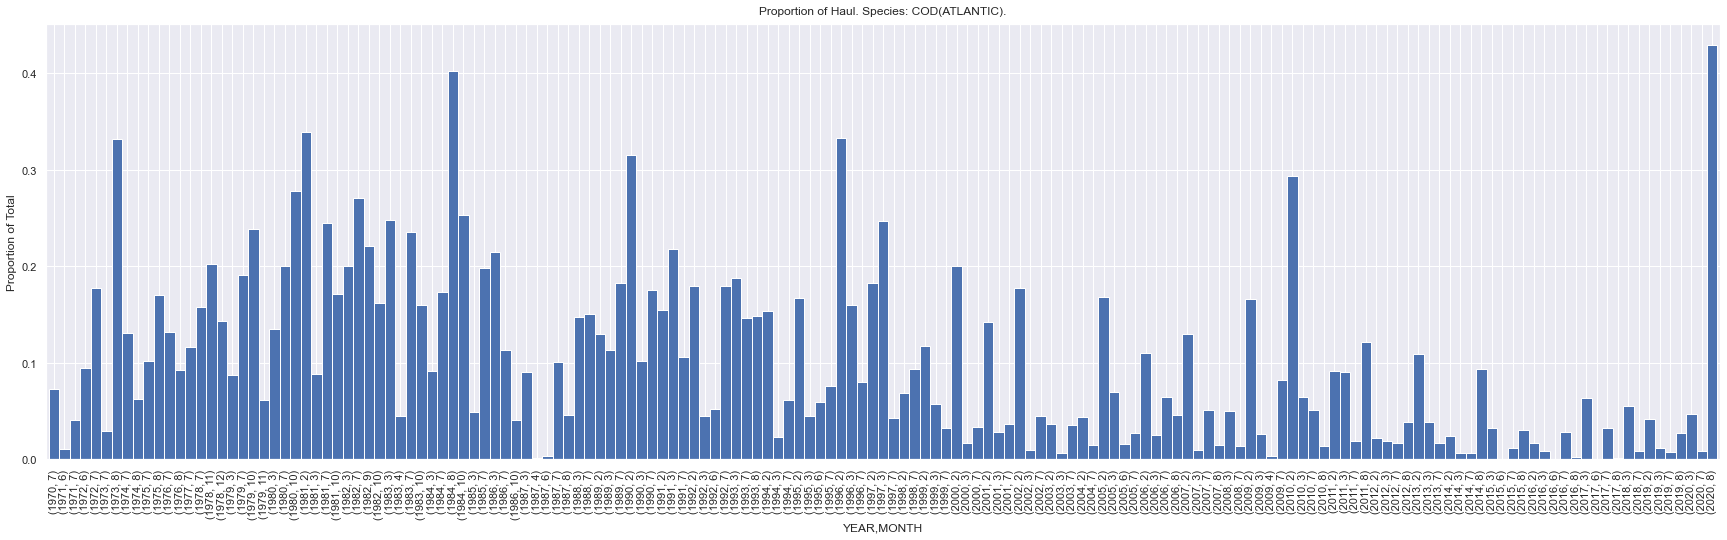

In [6]:
graph_species(filtered_monthly(df, by_weight=True), 10)

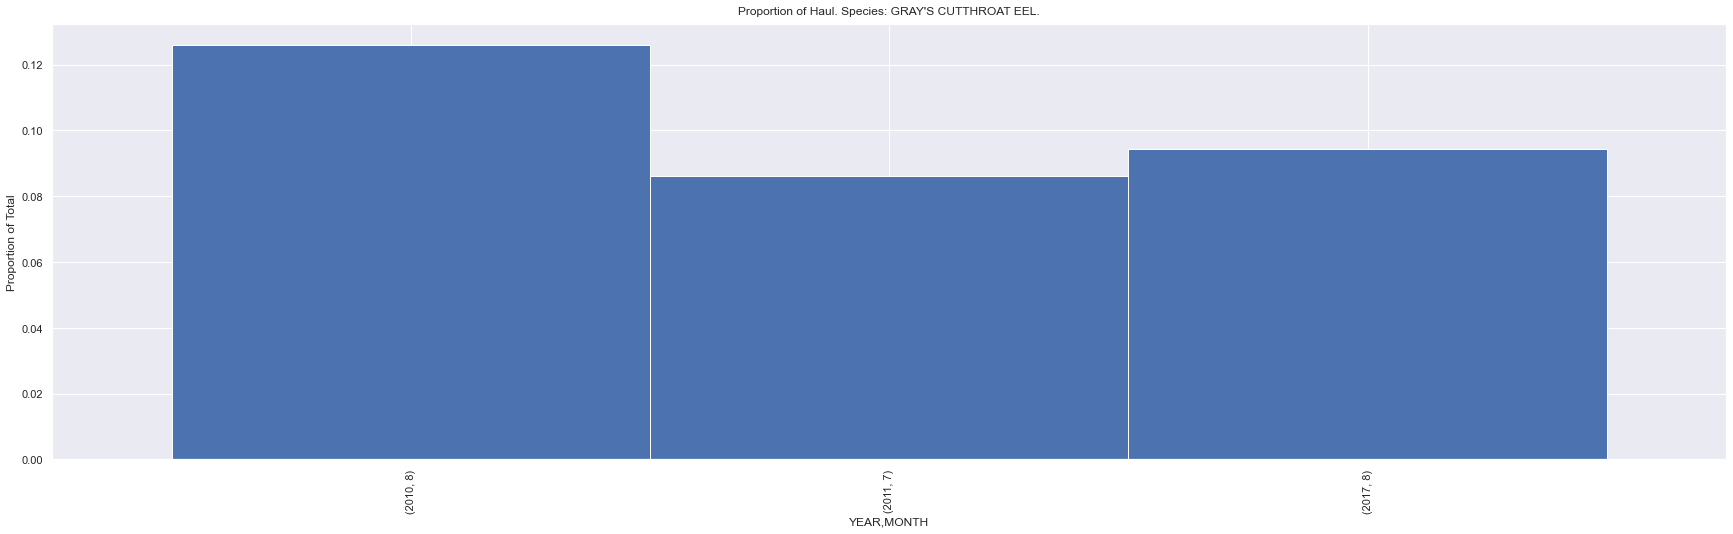

In [7]:
graph_species(filtered_monthly(df, df.DEPTH > 1000), 602)

In [8]:
print_species_data(df, 10)


 COD(ATLANTIC)


MATURITY
Resting                21151
Immature               20899
Recovering              8248
Ripening 1              6871
Ripening 2              5125
Spent                   4323
Ripe (Mature)           3581
Spawning (Running)      3439
Undetermined              27

SEX
FEMALE          48968
MALE            48683
UNKNOWN         10586
BERRIED FEMALE      2

STRAT
5Z2  18105
441   7507
455   7397
444   4870
447   4765
..     ...
439      4
396      4
5Z8      3
436      2
434      2

[86 rows x 1 columns]

In [9]:
print_species_data(df, 602)


 GRAY'S CUTTHROAT EEL


MATURITY
Undetermined        20

SEX
UNKNOWN   41

STRAT
501    343
502    340
498    328
503    319
504    193
497    156
496    134
397     12
451      8
404      7
505      7
398      3
466      2
5Z8      2
478      1
5Z4      1
400      1
472      1
399      1
462      1
559      1